In [29]:
import numpy as np
import pandas as pd
import json
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load tweets by bots
fp='D:/twitter-d3-dashboard/bot/file.csv'
bot_tweets=pd.read_csv(fp, low_memory=False)

In [3]:
bot_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1304343926829129729,1304343926829129729,1599814800000,2020-09-11,11:00:00,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN
1,1304341409743290370,1304341409743290370,1599814200000,2020-09-11,10:50:00,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN
2,1304337243339923457,1304337243339923457,1599813206000,2020-09-11,10:33:26,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN
3,1304329731484119041,1304329731484119041,1599811415000,2020-09-11,10:03:35,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN
4,1304326591036653569,1304326591036653569,1599810667000,2020-09-11,09:51:07,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN


In [70]:
len(bot_tweets[bot_tweets['user_id']==31098240])

500

In [67]:
len(bot_tweets)

872499

In [4]:
# Text analysis on these tweets 
bot_tweets['tweet'].head()

0    ‘Mens moet leefwyse verander’ @elisetempelhoff...
1    Solidariteit en NWU in arbeidsdispuut https://...
2    Helpende Hand reik hand om Siesta-oord in Bfn ...
3    Nog hulp vir flukse matriekseun https://www.ne...
4    Plase: Swart én wit is onder beleg https://www...
Name: tweet, dtype: object

In [5]:
tweets = bot_tweets["tweet"].values

In [6]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [20]:
sent_obj = bot_tweets['tweet'].apply(sentiment_calc)

In [21]:
bot_tweets['polarity'], bot_tweets['subjectivity'] = zip(*sent_obj)

In [22]:
conditions = [
    bot_tweets['polarity'] > 0,
    bot_tweets['polarity'] < 0,
    bot_tweets['polarity'] == 0
]

outputs = ['positive', 'negative','no value']

bot_tweets['sentiment'] = np.select(conditions, outputs)

In [24]:
bot_tweets['subjectivity']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
872494    0.0
872495    0.0
872496    0.0
872497    0.0
872498    0.0
Name: subjectivity, Length: 872499, dtype: float64

In [71]:
bot_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,polarity,subjectivity,sentiment
0,1304343926829129729,1304343926829129729,1599814800000,2020-09-11,11:00:00,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN,0.0,0.0,no value
1,1304341409743290370,1304341409743290370,1599814200000,2020-09-11,10:50:00,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN,0.0,0.0,no value
2,1304337243339923457,1304337243339923457,1599813206000,2020-09-11,10:33:26,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN,0.0,0.0,no value
3,1304329731484119041,1304329731484119041,1599811415000,2020-09-11,10:03:35,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN,0.0,0.0,no value
4,1304326591036653569,1304326591036653569,1599810667000,2020-09-11,09:51:07,W. Europe Daylight Time,31098240,netwerk24,Netwerk24,NaN,...,NaN,NaN,"[{'user_id': '31098240', 'username': 'Netwerk2...",NaN,NaN,NaN,NaN,0.0,0.0,no value


(array([411837.,  29126.,  57273.,  48333.,  69481., 101794.,  51062.,
         29231.,  18457.,  55905.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

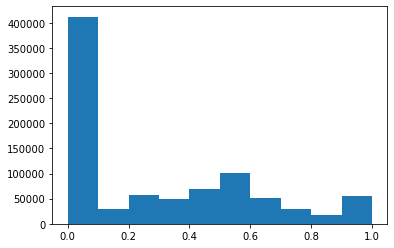

In [30]:
plt.hist(x=bot_tweets['subjectivity'])

(array([  2599.,   5346.,  15136.,  26628.,  60399., 559171.,  97942.,
         60094.,  20609.,  24575.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

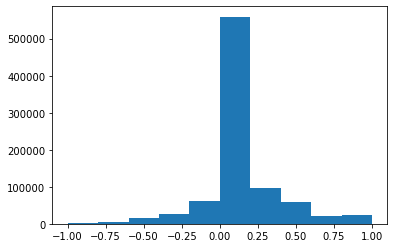

In [31]:
plt.hist(x=bot_tweets['polarity'])

In [33]:
# add aggregation columns
add_columns = pd.DataFrame(bot_tweets.groupby('user_id')['hashtags'].unique())
add_columns['nr_unique_hashtags'] = bot_tweets.groupby('user_id')['hashtags'].nunique()
add_columns['perc_has_place'] = bot_tweets.groupby('user_id')['place'].apply(lambda x: x.notnull().mean())
add_columns['perc_has_mention'] = bot_tweets.groupby('user_id')['mentions'].apply(lambda x: x.notnull().mean())
add_columns['perc_has_url'] = bot_tweets.groupby('user_id')['urls'].apply(lambda x: x.notnull().mean())
add_columns['nr_unique_urls'] = bot_tweets.groupby('user_id')['urls'].nunique()
add_columns['avg_nr_replies'] = bot_tweets.groupby('user_id')['replies_count'].mean()
add_columns['avg_nr_retweets'] = bot_tweets.groupby('user_id')['retweets_count'].mean()
add_columns['avg_nr_likes'] = bot_tweets.groupby('user_id')['likes_count'].mean()
add_columns['avg_subjectivity'] = bot_tweets.groupby('user_id')['subjectivity'].mean()
add_columns['stdev_subjectivity'] = bot_tweets.groupby('user_id')['subjectivity'].std()
add_columns['avg_polarity'] = bot_tweets.groupby('user_id')['polarity'].mean()
add_columns['stdev_polarity'] = bot_tweets.groupby('user_id')['polarity'].std()
#add_columns['nr_negative'] = bot_tweets.groupby('user_id')['sentiment']

#rename and add id column
add_columns= add_columns.reset_index()
add_columns.rename(columns={'user_id':'id'}, inplace=True)

In [44]:
fp_bot_data ='C:/Users/20194136/Documents/Personal_Development/twitter-d3-tool/Data/bot_classification_data.csv'
bot_data = pd.read_csv(fp_bot_data)

In [41]:
bot_data.head()

,Unnamed: 0,id,id_str,name,screen_name,location,description,url,protected,followers_count,...,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.url.urls,entities.description.urls,label
0,0,31098240,31098240,Netwerk24,Netwerk24,Johannesburg,"Al die nuus, politiek, sport, geldsake & verma...",https://t.co/Y0QuSqwwOL,False,188419,...,False,False,False,False,False,False,none,"[{'url': 'https://t.co/Y0QuSqwwOL', 'expanded_...",[],human
1,1,6892002,6892002,WBIR Channel 10,wbir,"Knoxville, TN","News, Sports, Weather & Live At Five at 4:00 -...",NaN,False,180759,...,False,False,False,False,False,False,none,NaN,[],human
2,2,20083388,20083388,Patricia Mazzei,PatriciaMazzei,Miami,@nytimes Miami bureau chief. Former @MiamiHera...,https://t.co/zGJ4T9rCnp,False,19311,...,False,False,False,False,False,False,none,"[{'url': 'https://t.co/zGJ4T9rCnp', 'expanded_...",[],human
3,3,385587235,385587235,Jeff Skowron,Jeffskowron,los angeles,"Actor, writer, co-creator of @greganddonny and...",https://t.co/sLdAcQfZXV,False,398,...,False,False,False,False,False,False,none,"[{'url': 'https://t.co/sLdAcQfZXV', 'expanded_...",[],human
4,4,51240839,51240839,Heather Crawford,HeatherFCN,"Jacksonville, FL","Wife, Mom, @FCN2Go Anchor @TSIChildren Mentor,...",https://t.co/eOw8ZfXBWc,False,7125,...,False,False,False,False,False,False,regular,"[{'url': 'https://t.co/eOw8ZfXBWc', 'expanded_...",[],human


In [45]:
bot_data = pd.merge(bot_data, add_columns, on='id', how='inner')

In [46]:
bot_data.head()

,Unnamed: 0,id,id_str,name,screen_name,location,description,url,protected,followers_count,...,perc_has_mention,perc_has_url,nr_unique_urls,avg_nr_replies,avg_nr_retweets,avg_nr_likes,avg_subjectivity,stdev_subjectivity,avg_polarity,stdev_polarity
0,0,31098240,31098240,Netwerk24,Netwerk24,Johannesburg,"Al die nuus, politiek, sport, geldsake & verma...",https://t.co/Y0QuSqwwOL,False,188419,...,1.0,1.0,473,0.148000,0.340000,0.62000,0.015876,0.108490,0.006639,0.064078
1,1,6892002,6892002,WBIR Channel 10,wbir,"Knoxville, TN","News, Sports, Weather & Live At Five at 4:00 -...",NaN,False,180759,...,1.0,1.0,495,0.600000,0.612000,2.76200,0.223115,0.291256,0.062583,0.205289
2,2,20083388,20083388,Patricia Mazzei,PatriciaMazzei,Miami,@nytimes Miami bureau chief. Former @MiamiHera...,https://t.co/zGJ4T9rCnp,False,19311,...,1.0,1.0,167,4.616000,29.282000,91.73000,0.280115,0.280331,0.074129,0.210632
3,3,385587235,385587235,Jeff Skowron,Jeffskowron,los angeles,"Actor, writer, co-creator of @greganddonny and...",https://t.co/sLdAcQfZXV,False,398,...,1.0,1.0,56,0.503891,0.274319,7.86965,0.193463,0.317888,0.010909,0.245739
4,4,51240839,51240839,Heather Crawford,HeatherFCN,"Jacksonville, FL","Wife, Mom, @FCN2Go Anchor @TSIChildren Mentor,...",https://t.co/eOw8ZfXBWc,False,7125,...,1.0,1.0,287,1.140000,2.548000,11.42800,0.317934,0.289029,0.135225,0.237199


In [68]:
len(bot_data)

1839

<AxesSubplot:xlabel='avg_nr_replies', ylabel='stdev_polarity'>

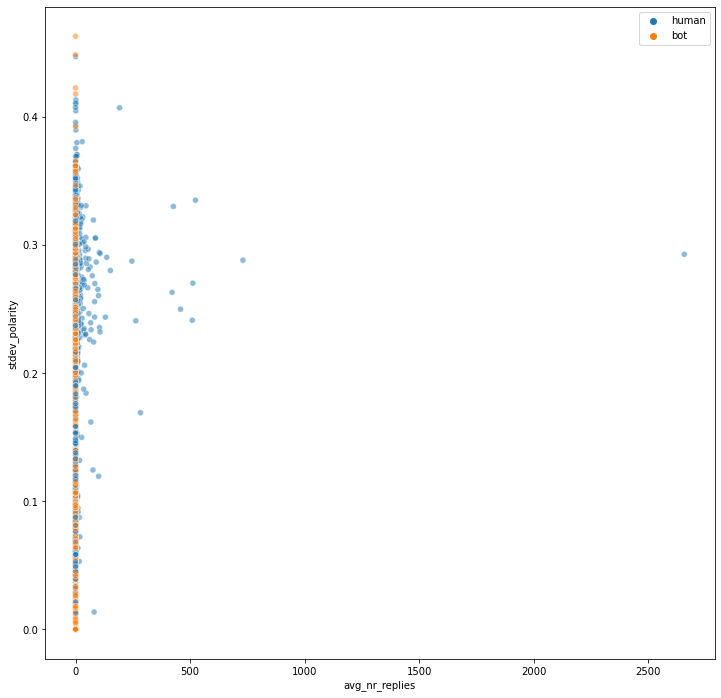

In [74]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(12,12)) 
sns.scatterplot(data=bot_data, x="avg_nr_replies", y="stdev_polarity", hue=bot_data["label"].tolist(), alpha=0.5)

In [57]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [90]:
feature_cols = ['followers_count', 'friends_count', 'listed_count','favourites_count','statuses_count','default_profile','default_profile_image','nr_unique_hashtags','perc_has_place','perc_has_mention','perc_has_url','nr_unique_urls', 'avg_polarity','avg_subjectivity','stdev_polarity' ]
X = bot_data[feature_cols] # Features
y = bot_data.label # Target variable

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [92]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9420289855072463


In [94]:
metrics.confusion_matrix(y_test, y_pred)

array([[102,  17],
       [ 15, 418]], dtype=int64)

In [95]:
clf.feature_importances_

array([0.04431937, 0.18286306, 0.03049047, 0.03275692, 0.03671557,
       0.        , 0.        , 0.03166276, 0.        , 0.        ,
       0.        , 0.61119698, 0.00951243, 0.02048245, 0.        ])

In [ ]:
X.head()